<a href="https://colab.research.google.com/github/sandhc1/GUVI_DS/blob/main/Practice/Machine%20Learning/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regresion**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sandhc1/DataSets/main/student_scores.csv') #read the dataset

In [ ]:
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
dataset.Hours.quantile(0.75)

7.4

In [ ]:
iqr = dataset.Hours.quantile(0.75) - dataset.Hours.quantile(0.25)
upper_threshold = dataset.Hours.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Hours.quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-4.3500000000000005
14.450000000000001


values greater than q3 + 1.5iqr -> outlier
values less than q1 - 1.5iqr -> outlier




No skew in the data. 

In [ ]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
dataset = dataset.drop_duplicates() #duplicate rows deleted
dataset.shape

(25, 2)

In [ ]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

Median and mean are closer to each other - there is less skew in the data

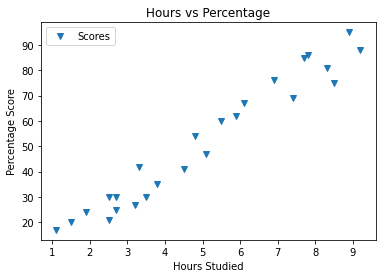

In [ ]:
# 1st way to find whether there is a linear relationship or not

dataset.plot(x='Hours', y='Scores', style='v')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


1) Is there any linear relationship between the feature and target - Yes

2) No transformation is required

In [ ]:
# 2nd way to find linear relationship between hours and score
# value>0.2 +ve correlation
# value<-0.2 -ve correlation

dataset.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.



In [ ]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# Preparing the data

In [ ]:
#dataset.loc[row_criteria,column_criteria]

In [ ]:
X = dataset.loc[:, ['Hours']].values # select all rows and select all columns except the last column as my feature
y = dataset.loc[:, 'Scores'].values # target as arrays
# Syntax : dataset.loc[:, :-1]

#import the required function
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

#random_state can be any value
#any one using same random value from diff machine every one will get the same set of data
#to ensure we get same result

In [ ]:
y_test

array([17, 42, 24, 75, 54])

In [ ]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

# Normlising/Scaling the data

In [ ]:
#from sklearn.preprocessing import StandardScaler # importing the required function
#scaler = StandardScaler() #initialis
#scaler.fit(X_train) # find the values of mu and sigma
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# shivaData = np.array([1.4,2.3,3.3,4,-4]).reshape(-1,1)
# scaler = MinMaxScaler()
# scaler.fit(shivaData)
# scaler.transform(shivaData)

In [ ]:
# scaler.var_

In [ ]:
X_test

array([[1.1],
       [3.3],
       [1.9],
       [8.5],
       [4.8]])

# Modelling

In [ ]:
#Model for algorithm - score = (m * hours) + c

In [ ]:
from sklearn.linear_model import LinearRegression 
#importing all the required functions
# LR is a class

regressor = LinearRegression() 
# predicted score = m * hours + c  
# we creating object of the class LinearRegression called regressor

regressor.fit(X_train, y_train) 
#Learning happens - GD is done and we get the final values of m and c
# will get best values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

-1.5369573315500702


In [ ]:
print(regressor.coef_) # slope - m

# predicted score  = 10.46 * (hours) + (-1.53)

[10.46110829]


In [ ]:
regressor.predict([[5]])

array([50.76858414])

In [ ]:
#regressor.predict(scaler.transform(np.array([4]).reshape(-1,1)))

In [ ]:
y_pred = regressor.predict(X_test) 
# given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"

y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [ ]:
regressor.predict([[12]]) 

# perils of extrapolation
# marks can not be 123.99
# my data has hrs from 1 to 9
# if i take greater than 9 or less then 1 that is not as extrapolation
# there is no guarantee that it will work correctly.

array([123.99634219])

# Metrics

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)# another way to get the r^2 values

R2- SCORE: 0.8421031525243527


0.8421031525243527

# Custom Loss Function

In [ ]:
X

In [ ]:
beta_init -> parameter
X -> fts
y -> target
ypred ->  matmul of beta_init and X = np.matmul(X,beta)
loss -> mean(abs(y - y_pred)) = np.mean(np.abs(y - np.matmul(X,beta)))

In [ ]:
#Gradient descent to find the params that minimze the loss function

from scipy.optimize import minimize
import numpy as np
#minimize - given a function, it will try to find the params that makes the function the lowest value


# np.matmul(X,np.square(beta)) = prediceted = x * beta
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

# we will write our own loss function
# my model is ypred = m^2 * x + c^2
# my loss function is MSE loss funcition =>
# my loss function is np.mean((Y - np.matmul(X,np.square(beta))))
#beta stores the values of the parameters : beta[0]  will be m and beta[1] will be c
# ypred = (np.square(beta[0]) * X) + (np.square(beta[1]) * 1)
#mse = np.mean(np.square(ypred - y))

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    #X = np.c_[X,np.ones(X.shape[0])]
    error = np.mean(np.square(((np.square(beta[0]) * X) + (np.square(beta[1]) * 1)) - Y)) 
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([2,5]) # initiate the model with a random value

#code for doing gradient descent
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 9.75 * hoursStudies
print(beta_hat)

[6.25722145e-03 7.33142692e+00]


In [ ]:
from scipy.optimize import minimize
# y = mx + c 
def objective_function(beta, X, Y):
    b = np.ones((X.shape[0],X.shape[1]+1))
    b[:,:-1] = X
    error = np.mean(np.abs(np.matmul(b,beta) - Y))
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([1,1])
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500})

# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x
print(beta_hat)

[10.05966933  2.64795088]


# **Effect of Outlier**

In [ ]:
X_train_outlier = np.vstack([X_train,scaler.transform([[24]])])
y_train_outlier = np.append(y_train,100)

plt.scatter(X_train_outlier, y_train_outlier)



regressor = LinearRegression()
regressor.fit(X_train_outlier, y_train_outlier)
y_pred = regressor.predict(X_test)
# print(y_pred)
# print(y_test)
print(regressor.coef_[0],regressor.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 :', np.sqrt(metrics.r2_score(y_test, y_pred)))

In [ ]:
#Gradient descent to find the params that minimze the loss function

from scipy.optimize import minimize

# np.matmul(X,np.square(beta)) = prediceted = x * beta
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    X = np.c_[X,np.ones(X.shape[0])]
    error = np.mean(np.abs(np.matmul(X,beta) - Y)) # average of absolute value of (predicted - trueLabel)
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([6,5]) # initiate the model with a random value

#code for doing gradient descent
result = minimize(objective_function, beta_init, args=(X_train_outlier,y_train_outlier),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 10.6 * hoursStudies
print(beta_hat)

# **Multiple Linear Regression**

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/sandhc1/DataSets/main/petrol_consumption.csv')

In [ ]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
dataset.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
iqr = dataset.Paved_Highways.quantile(0.75) - dataset.Paved_Highways.quantile(0.25)
upper_threshold = dataset.Paved_Highways.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Paved_Highways.quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-2958.375
13224.625


In [ ]:
sum(dataset.Paved_Highways > upper_threshold)

2

In [ ]:
dataset.shape

(48, 5)

In [ ]:
dataset.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


# **EDA**

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean()

Petrol_tax
5.00     640.000000
6.00     782.000000
6.58     644.000000
7.00     631.736842
7.50     536.000000
8.00     502.000000
8.50     582.666667
9.00     530.875000
10.00    457.000000
Name: Petrol_Consumption, dtype: float64

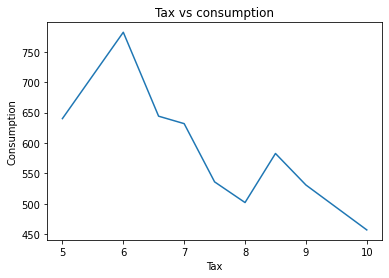

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [ ]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

# there is a -ve relationship between tax and consumption

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


1) There is a linear relationship between tax and consumption
2) As tax increases, comsumption decreases
3) No transformation required


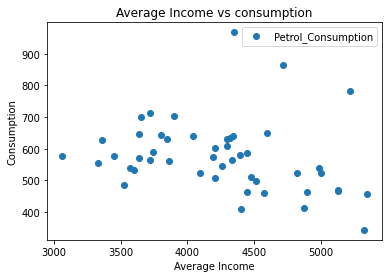

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [ ]:
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()

dataset[['Average_income','Petrol_Consumption']].corr()

1) There is a low linear relationshp between the data 
2) No transformation reqd
3) The direction of relatiohsnip is not in-line with our GK

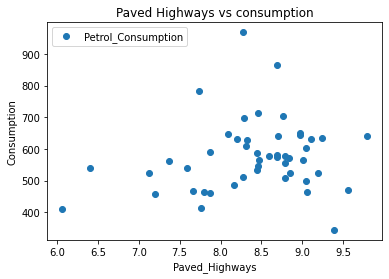

,transformed,Petrol_Consumption
transformed,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


In [ ]:
import numpy as np
dataset['transformed'] = np.log(dataset['Paved_Highways'])
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

1) There is no linear relationship between highways and consumption
2) Have tried all trasnformations - still not able to see a good linear relationship
3) Have decided to drop the feature

In [ ]:
#dataset['logPaved_Highways']  = np.log(dataset['Paved_Highways'])

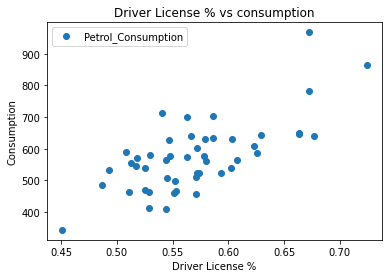

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [ ]:
dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

1) High correlation between the data 
2) No transformation reqd

In [ ]:
X = dataset[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

# Model training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# petrol_consumption = -29.56 *scaled_petrol_tax + -38.03 * scaled_avg_income +  80.69 * scaled_pop_driver + 583

,Coefficient
Petrol_tax,-29.564915
Average_income,-38.034850
Population_Driver_licence(%),80.695238


In [ ]:
regressor.coef_

# drive licence has major impact followed by tax then income.
# Indian government want to reduce the consumption of petrol so which policy will be effective?
# by increasing the driving licence age by 18 to 21.

array([-29.5649152 , -38.03485015,  80.69523834])

In [ ]:
regressor.intercept_ # c 

583.9736842105262

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,534,475.009063
1,410,520.746645
2,577,593.837289
3,571,566.627853
4,577,664.027455
5,704,645.700518
6,487,500.905660
7,587,663.819704
8,467,482.121399
9,580,501.285450


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.32520447692222665


# Feature Selection

# RFE

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],selector.support_))

# Sequential Feature selection

In [ ]:
!pip install scikit-learn==0.24.2

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],sfs.get_support())))

In [ ]:
list(zip([1,2,3],['a','b','c']))

In [ ]:
X_trans = sfs.transform(X)
X_trans # feature selection

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [ ]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()


# **Ridge Regression**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

